# Visualization

In [76]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
house = pd.read_csv('preprocess_data.csv')
house.head()

,Unnamed: 0,Area(square meters),Avg price(RMB),"Total price(10,000RMB)",Deal date,The year a apt was built,Facing direction,#floors,decoration,Community,Number of Bedroom,Number of Bathroom
0,0,42.50,76471,325.0,2019/5/4,1983,south,intermediate floor(6 floors in total),3,动力厂宿舍,1,1
1,1,63.43,69053,438.0,2019/2/21,1996,south north,low floor(6 floors in total),2,动力厂宿舍,2,1
2,2,63.15,69359,438.0,2018/5/11,1996,south north,top floor(6 floors in total),2,动力厂宿舍,2,1
3,3,62.10,65057,404.0,2018/4/26,1983,south,intermediate floor(6 floors in total),3,动力厂宿舍,2,1
4,4,63.10,67194,424.0,2018/4/8,1999,south north,top floor(6 floors in total),3,动力厂宿舍,2,1


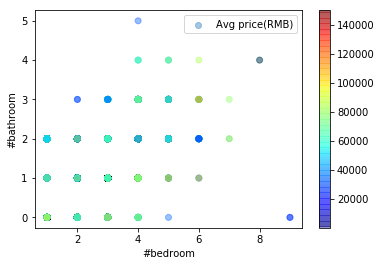

In [6]:
fig = plt.scatter(x=house['Number of Bedroom'], y=house['Number of Bathroom'], alpha=0.4, \
    c=house['Avg price(RMB)'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.xlabel('#bedroom')
plt.ylabel('#bathroom')
plt.legend(['Avg price(RMB)'])   
plt.show()

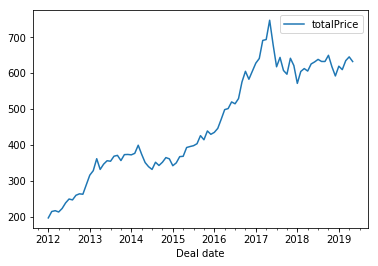

In [7]:
price_by_trade_time = pd.DataFrame()
price_by_trade_time['totalPrice'] = house['Total price(10,000RMB)']
price_by_trade_time.index = house['Deal date'].astype('datetime64[ns]')
price_by_trade_month = price_by_trade_time.resample('M').mean().to_period('M').fillna(0)
price_by_trade_month.plot(kind='line')
plt.show()

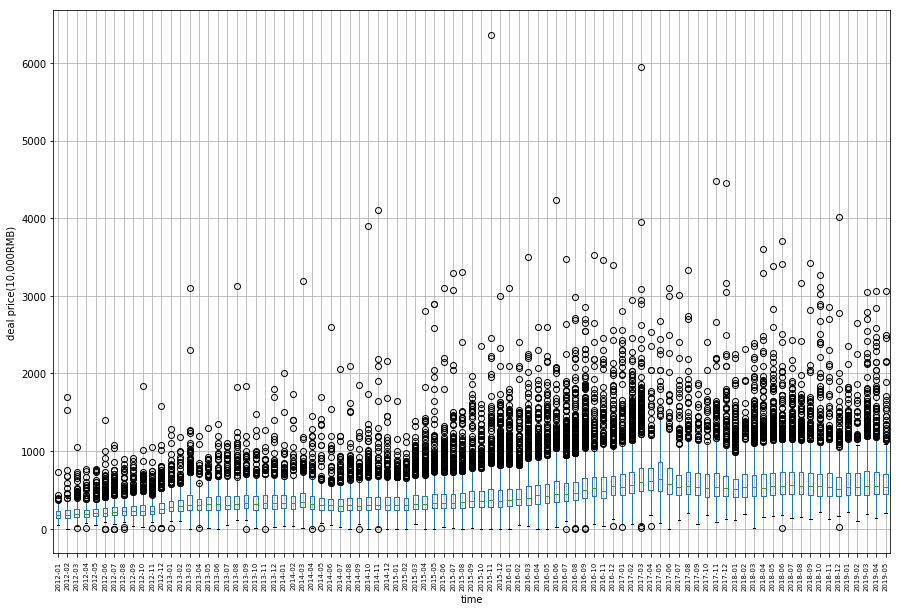

In [8]:
# month - deal prices
price_stat_trade_month_index = [x.strftime('%Y-%m') for x in set(price_by_trade_time.to_period('M').index)]
price_stat_trade_month_index.sort()
price_stat_trade_month = []
for month in price_stat_trade_month_index:
    price_stat_trade_month.append(price_by_trade_time[month]['totalPrice'].values)
price_stat_trade_month = pd.DataFrame(price_stat_trade_month)
price_stat_trade_month.index = price_stat_trade_month_index
price_stat_trade_month = price_stat_trade_month.T
price_stat_trade_month.boxplot(figsize=(15,10))
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('time')
plt.ylabel('deal price(10,000RMB)')
plt.show()

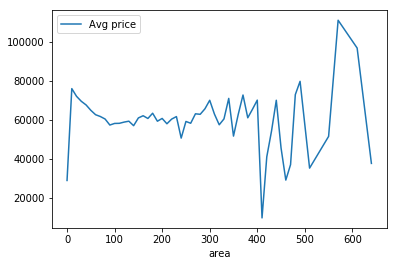

In [9]:
#area(m^2) and avg price(RMB)
price_by_square = pd.DataFrame()
price_by_square['avgPrice'] = house['Avg price(RMB)']
price_by_square['square'] = house['Area(square meters)']
price_by_square['square'] = np.ceil(price_by_square['square'])
price_by_square['square'] = price_by_square['square'] - (price_by_square['square'] % 10)
price_by_square_index = list(set(price_by_square['square']))
price_by_square_index.sort()
price_by_square.index = price_by_square['square']
price_by_square_line = []
price_by_square_stat = []
for squares in price_by_square_index:
	price_by_square_line.append(price_by_square.loc[squares]['avgPrice'].mean())
	try:
		price_by_square_stat.append(price_by_square.loc[squares]['avgPrice'].values)
	except Exception:
		price_by_square_stat.append(np.array([price_by_square.loc[squares]['avgPrice']]))
plt.plot(price_by_square_index, price_by_square_line)
plt.xlabel('area')    
plt.legend(['Avg price'])   
plt.show()


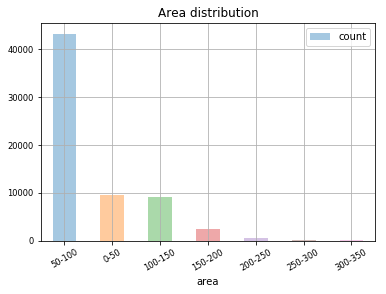

In [10]:
fig,ax2 = plt.subplots(1,1)    
area_level = [0, 50, 100, 150, 200, 250, 300, 500]    
label_level = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']    
area_cut = pd.cut(house['Area(square meters)'], area_level, labels=label_level)        
area_cut.value_counts().plot(kind='bar', rot=30, alpha=0.4, grid=True, fontsize='small', ax=ax2)    
plt.title('Area distribution')    
plt.xlabel('area')    
plt.legend(['count'])    
plt.show()

In [30]:
location = pd.read_csv('location_dataset.csv')
location.head()

,FID,community,transaction prices,total square footage,avg square footage,total amount,volume,latitude,longitude,INPUT_FID,DISTANCE to SP,Distance to ZGC
0,0,___,56867.75758,3121.10,94.578788,175396490.9,33,40.045743,116.327245,0,3782.725266,7228.170548
1,1,____,48520.57895,1536.60,80.873684,74030777.8,19,40.038225,116.336347,1,4521.156064,6561.689152
2,2,____,62488.39535,2468.34,57.403256,149184000.6,43,40.051171,116.327050,2,3851.321416,7822.335224
3,3,___,52573.30508,3541.91,60.032373,184490045.6,59,40.047127,116.328423,3,3885.713226,7394.161845
4,4,_____,46202.35088,4581.07,80.369649,204723314.6,57,40.046376,116.332208,4,4170.529873,7365.102121


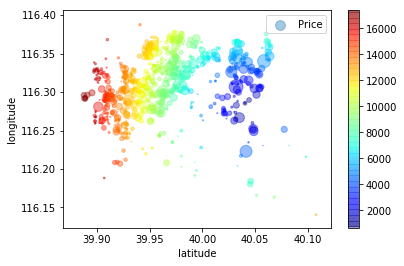

In [75]:
# The relationship between housing price and the distance to software park.
fig = plt.scatter(x=location['latitude'], y=location['longitude'], alpha=0.4, \
                  s=location['total amount']/5000000, label='Price', \
                  c=location['DISTANCE to SP'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()
plt.show()

# Prediction

In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [78]:
location = pd.read_csv('location_dataset.csv')

train, test = train_test_split(location,test_size=0.33,random_state=42)
train.head()

,FID,community,transaction prices,total square footage,avg square footage,total amount,volume,latitude,longitude,INPUT_FID,DISTANCE to SP,Distance to ZGC
595,595,___,54875.25000,1019.57,127.446250,5.616047e+07,8,40.046523,116.307253,595,2251.207405,7245.394348
140,140,____49_,76486.25000,241.90,60.475000,1.812007e+07,4,39.907951,116.300365,140,15166.560040,8214.381021
173,173,_____,80966.66667,1213.06,202.176667,9.600083e+07,6,39.914631,116.301507,173,14440.387910,7467.374905
6,6,_______,53223.50000,1188.77,59.438500,6.270557e+07,20,40.038875,116.335790,6,4469.229302,6619.543385
585,585,_____,63114.08889,6103.09,135.624222,3.811635e+08,45,40.048635,116.248998,585,2343.477999,8963.854813


In [79]:
dropped_attributes = ['FID', 'community', 'total square footage', 'INPUT_FID']


train = train.drop(dropped_attributes,axis=1)
test = test.drop(dropped_attributes,axis=1)

train.head()

,transaction prices,avg square footage,total amount,volume,latitude,longitude,DISTANCE to SP,Distance to ZGC
595,54875.25000,127.446250,5.616047e+07,8,40.046523,116.307253,2251.207405,7245.394348
140,76486.25000,60.475000,1.812007e+07,4,39.907951,116.300365,15166.560040,8214.381021
173,80966.66667,202.176667,9.600083e+07,6,39.914631,116.301507,14440.387910,7467.374905
6,53223.50000,59.438500,6.270557e+07,20,40.038875,116.335790,4469.229302,6619.543385
585,63114.08889,135.624222,3.811635e+08,45,40.048635,116.248998,2343.477999,8963.854813


In [109]:
x_train = train.drop(['total amount'],axis=1)
y_train = train['total amount']
x_train.head()

,transaction prices,avg square footage,volume,latitude,longitude,DISTANCE to SP,Distance to ZGC
595,54875.25000,127.446250,8,40.046523,116.307253,2251.207405,7245.394348
140,76486.25000,60.475000,4,39.907951,116.300365,15166.560040,8214.381021
173,80966.66667,202.176667,6,39.914631,116.301507,14440.387910,7467.374905
6,53223.50000,59.438500,20,40.038875,116.335790,4469.229302,6619.543385
585,63114.08889,135.624222,45,40.048635,116.248998,2343.477999,8963.854813


In [110]:
y_train.head()

595    5.616047e+07
140    1.812007e+07
173    9.600083e+07
6      6.270557e+07
585    3.811635e+08
Name: total amount, dtype: float64

In [118]:
# Linear regression
model1 = LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.8981764543008849

In [119]:
x_test = test.drop('total amount',axis=1)
y_predict = model1.predict(x_test)
print(y_predict.reshape(-1,1))

[[ 3.97136139e+08]
 [ 2.70671181e+07]
 [ 2.05367441e+08]
 [ 2.00704428e+07]
 [ 2.50994371e+07]
 [ 3.86330160e+07]
 [ 3.72463068e+07]
 [ 2.57781892e+08]
 [-6.11602715e+05]
 [ 3.50980172e+07]
 [ 8.00320710e+07]
 [ 9.92668855e+06]
 [ 1.74446168e+08]
 [ 5.11069584e+07]
 [-2.98217367e+07]
 [ 5.90013219e+07]
 [ 5.33483186e+07]
 [ 1.34438501e+08]
 [ 1.30266577e+08]
 [ 9.27744332e+07]
 [ 5.46177705e+07]
 [ 8.38184281e+06]
 [ 1.42747860e+08]
 [ 6.18389690e+06]
 [ 3.71071905e+07]
 [ 1.07409511e+07]
 [ 1.03500276e+08]
 [ 3.29517386e+07]
 [ 1.62173293e+07]
 [ 4.15954036e+07]
 [ 3.15278373e+07]
 [ 1.33156141e+08]
 [-8.41137676e+06]
 [ 4.24829418e+06]
 [ 6.03135303e+07]
 [-1.36049136e+07]
 [ 6.59516765e+07]
 [ 2.74701358e+07]
 [ 2.20185635e+08]
 [ 3.38533258e+07]
 [-3.77964837e+07]
 [ 5.73282053e+07]
 [ 2.38217685e+08]
 [ 3.90752443e+07]
 [ 1.42630522e+08]
 [ 6.33631780e+06]
 [ 1.62917006e+08]
 [ 7.18978912e+07]
 [ 1.23879100e+08]
 [ 7.06581727e+07]
 [ 3.07224124e+08]
 [-1.08458009e+07]
 [ 6.7091360

In [120]:
print(test['total amount'])

865    3.715685e+08
439    1.301008e+07
342    1.741591e+08
736    2.621026e+07
785    1.457020e+07
837    4.563050e+07
523    3.016017e+07
265    2.553498e+08
903    3.400045e+06
735    3.857036e+07
537    6.975062e+07
906    1.060010e+07
67     1.607373e+08
141    3.327822e+07
305    1.925028e+06
765    4.037535e+07
30     6.195058e+07
429    1.548611e+08
633    1.600019e+07
490    7.054027e+07
298    5.086554e+07
213    8.490051e+06
244    1.569510e+08
457    1.655811e+07
482    1.004005e+07
762    3.800046e+06
350    1.014005e+08
669    2.835613e+07
696    1.169005e+07
302    3.511023e+07
           ...     
355    2.539935e+08
589    3.892522e+07
643    1.903021e+07
692    8.240051e+06
409    3.706372e+08
442    1.273510e+08
382    2.419375e+08
590    1.119558e+08
172    6.394044e+07
465    1.676014e+07
417    4.572051e+07
433    1.236006e+07
815    2.683030e+07
90     1.710781e+08
849    1.088031e+07
181    1.402998e+08
485    9.440026e+06
809    6.030042e+06
69     6.016058e+07


In [121]:
model1.score(x_test, test['total amount'])

0.8917252456543753

In [122]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)
model2.score(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9859318810889787

In [123]:
output = model2.predict(x_test)
model2.score(x_test,test['total amount'])

0.9110471839130764